In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from IPython import display
# Import everything in the functions folder
from functions.proj1_helpers import *
from functions.clean_data import *
from functions.least_squares import *
from functions.split import *

# Cleaning and Analysis #2

In the notebook `Cleaning_and_Analysis_Simple` we tried to remove columns or change the NaNs with the mean value or the median. But we saw that if we don't study the data correctly, it doesn't work that well. So, in this notebook, we will first study the data. 

## Study of the data

First, we load the training data. (We'll test our hypothesis on the test data later.

In [3]:
DATA_TRAIN_PATH = 'data/train.csv' 
_, _, _, headers = load_data(DATA_TRAIN_PATH)
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

Since we never checked what the data look like, it would be a good idea to use an histogram on all the columns to get an idea about each of the variables.

Number of variables: 30


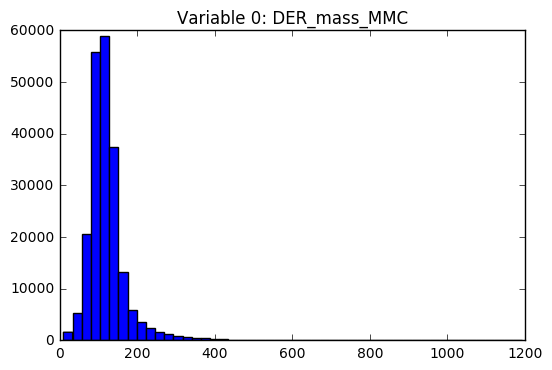

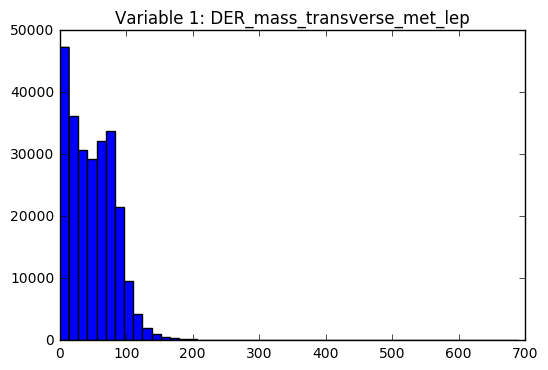

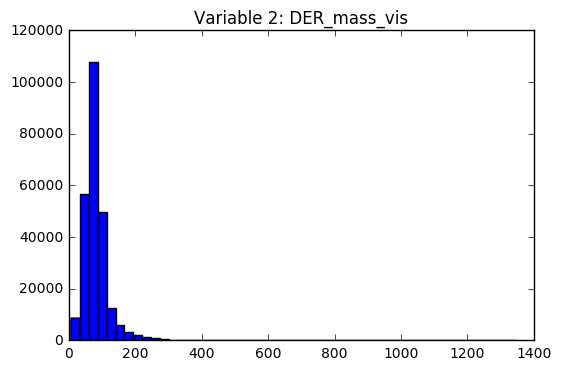

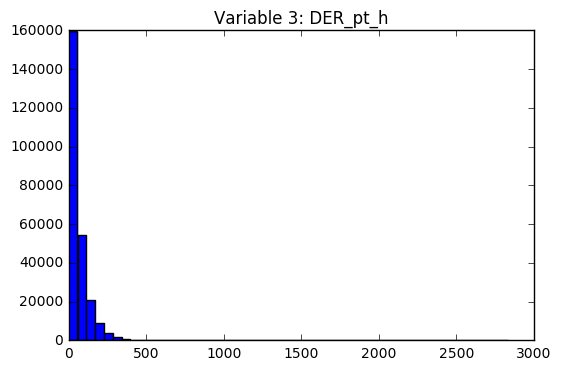

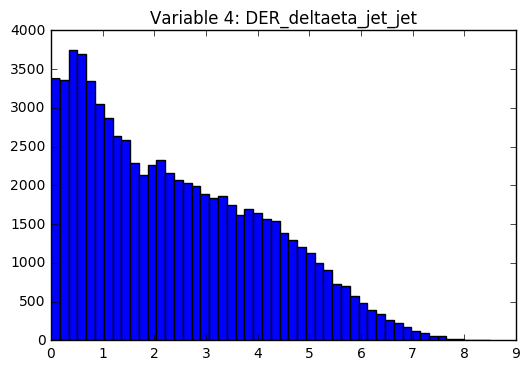

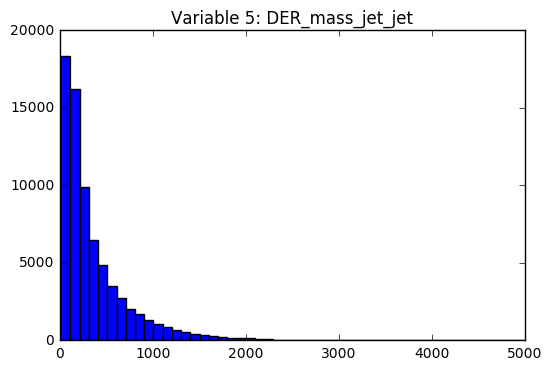

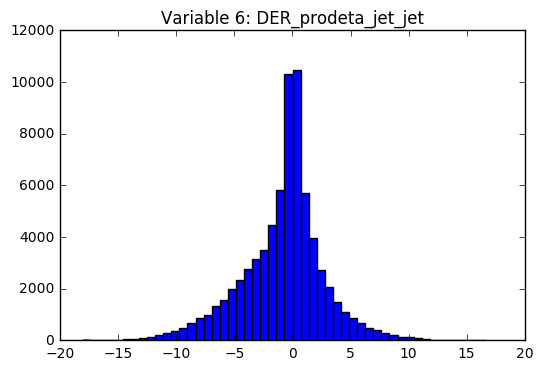

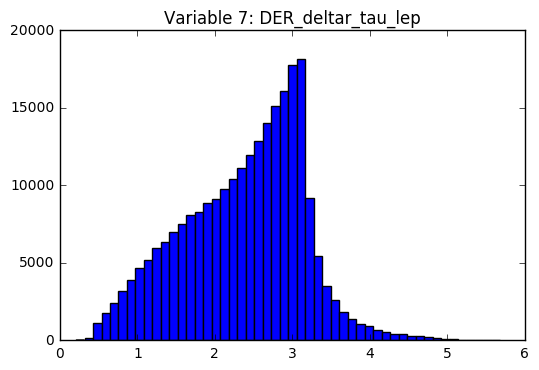

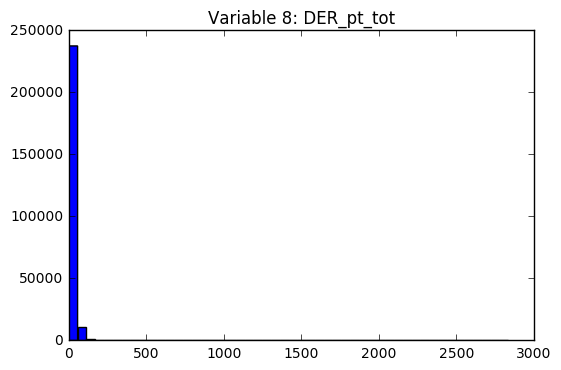

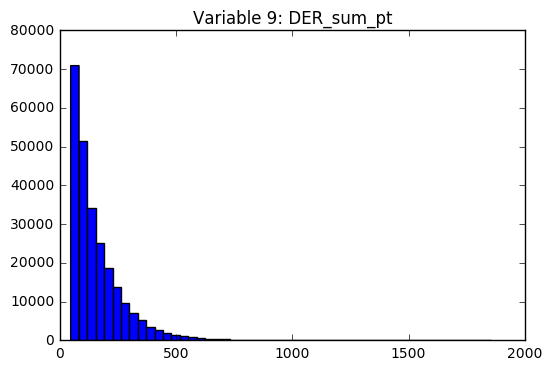

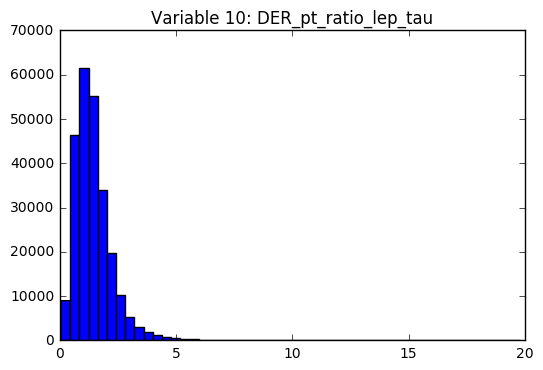

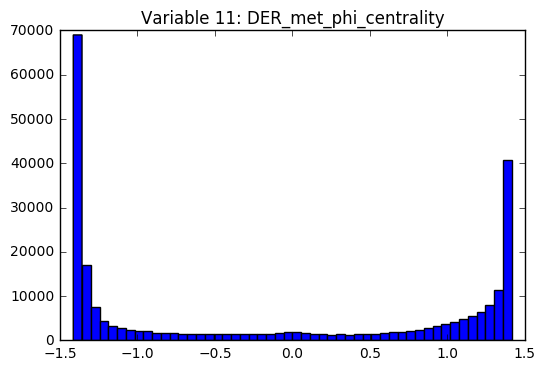

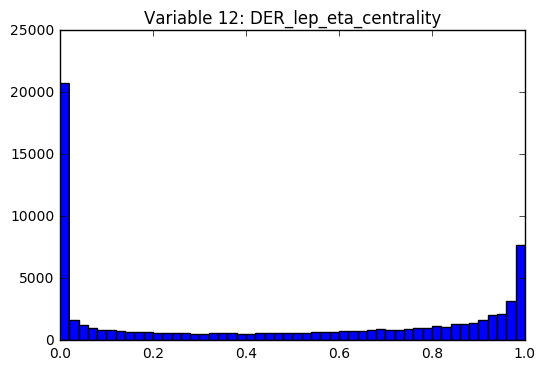

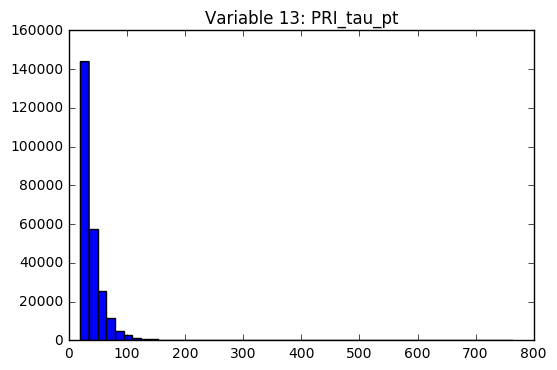

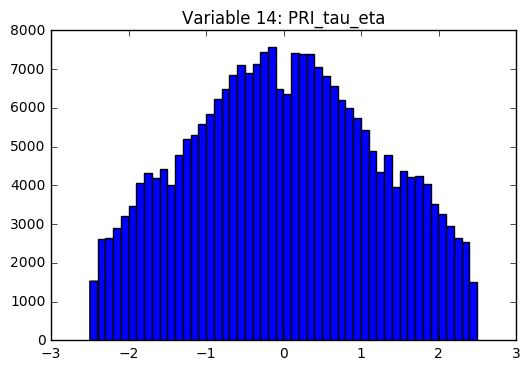

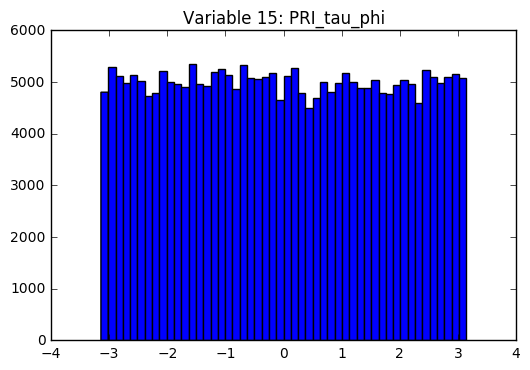

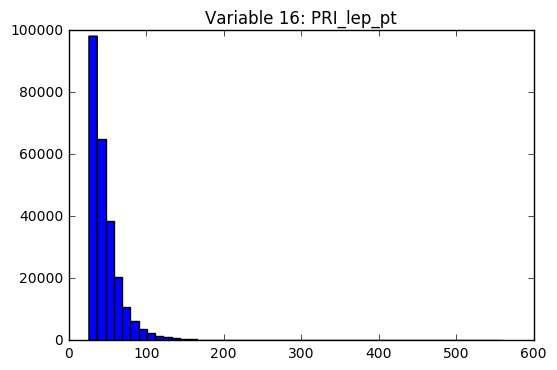

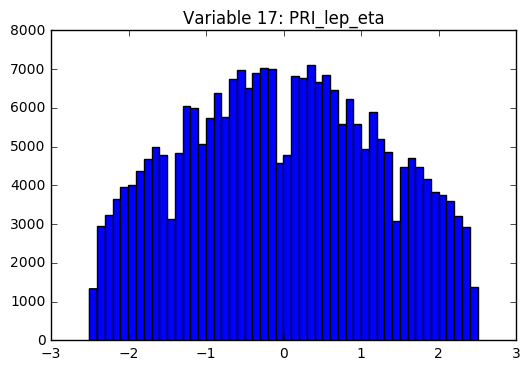

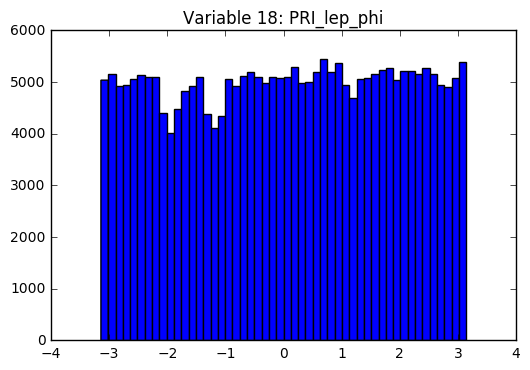

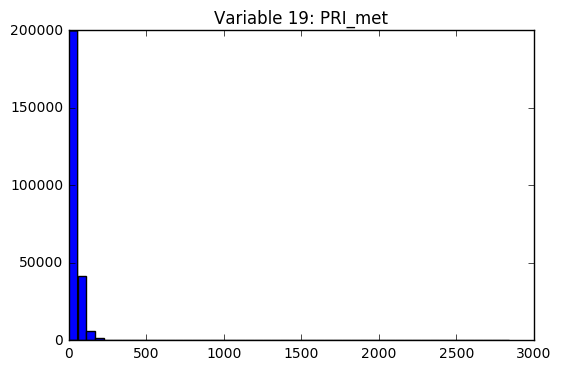

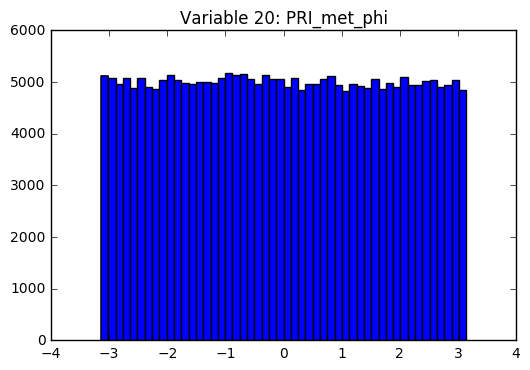

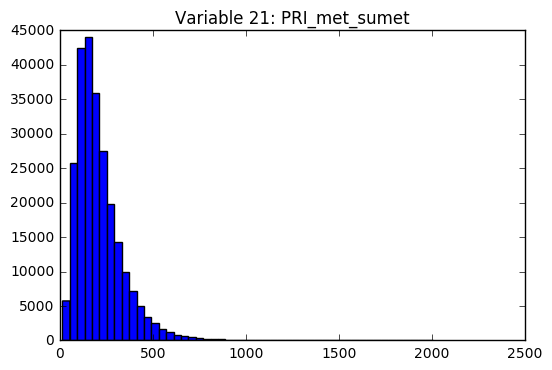

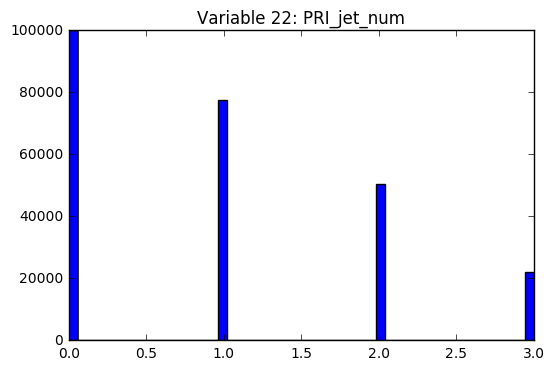

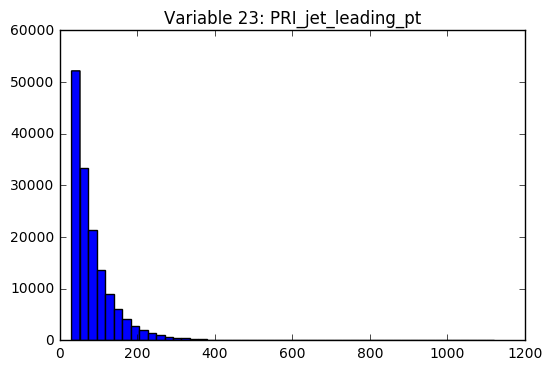

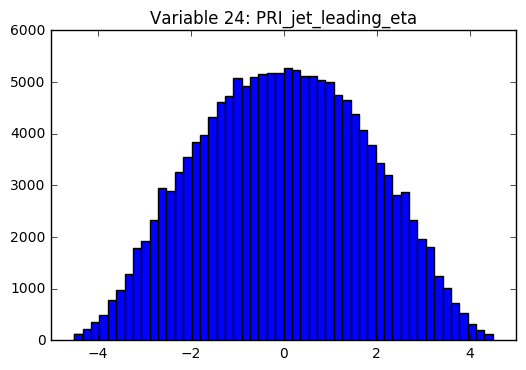

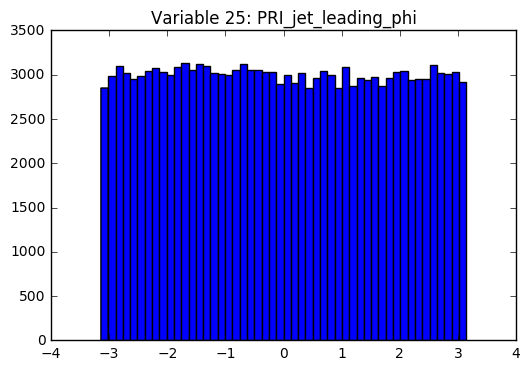

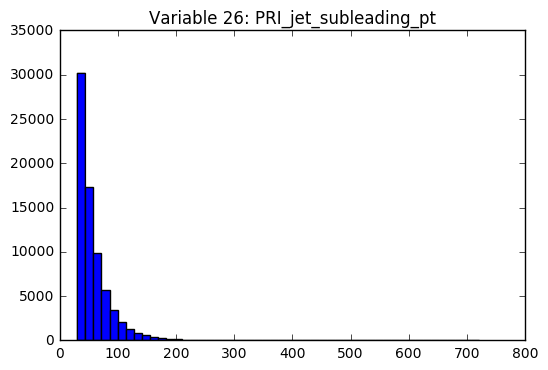

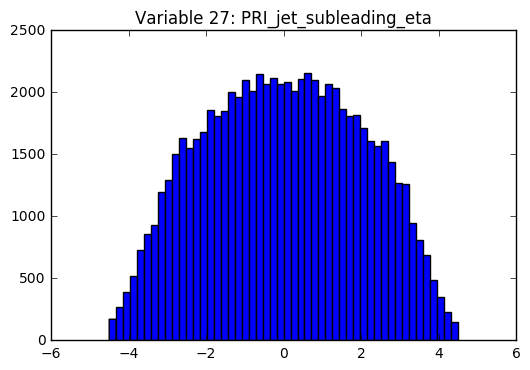

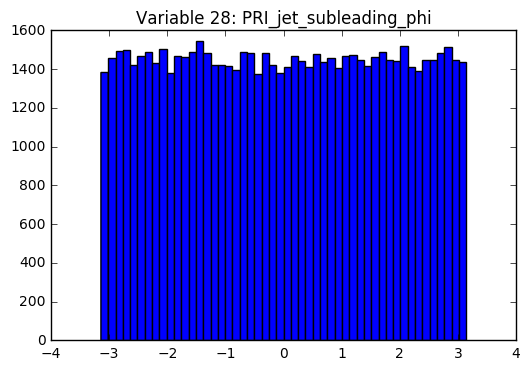

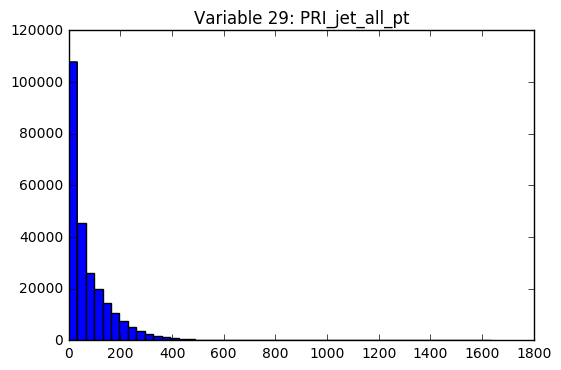

In [63]:
nbr_param = len(tX[0])
print("Number of variables: %i"%(nbr_param))

# Plot the histograms
for i in range(len(tX[0])):
    array = tX[:,i]
    n, bins, patches = plt.hist(array[array != -999], 50)
    plt.title("Variable %i: %s"%(i, headers[i+2]))
    plt.show()

We have a lot of interesting histograms. We can see different kind of distributions. But one of the most interesting histogram is the one with `PRI_jet_num`. Indeed, we have only four values available and this can be explained easily. When particles collide (especially heavy ion or quark or gluon), they can create a cone of hadrons (or other particles) called **jet**. We also see that the next histograms are about angles. But if we have 0 or 1 jet, then we won't have any angle. So, let's check the percentage of data with jet equals to 0 or to 1.

In [21]:
nbr_jets = tX[:,22]
perc_zero_one_jet = (len(nbr_jets[nbr_jets == 0]) + 
                     len(nbr_jets[nbr_jets == 1])) / len(nbr_jets)
print("Percentage of 0 or 1 jet: %f"%perc_zero_one_jet)

Percentage of 0 or 1 jet: 0.709828


And now we see a really interesting result. In the notebook `Cleaning_and_Analysis_Simple`, we saw that some columns has around 70% of missing values. These missing values then correspond to the 0 or 1 jet. So, let's cut the matrix of parameters into four matrices, one for each jet.

In [124]:
tX_jet_0 = tX[tX[:,22] == 0]
tX_jet_1 = tX[tX[:,22] == 1]
tX_jet_2 = tX[tX[:,22] == 2]
tX_jet_3 = tX[tX[:,22] == 3]

# Remove the column 22 with only 1 value
tX_jet_0 = np.delete(tX_jet_0, 22, 1)
tX_jet_1 = np.delete(tX_jet_1, 22, 1)
tX_jet_2 = np.delete(tX_jet_2, 22, 1)
tX_jet_3 = np.delete(tX_jet_3, 22, 1)

# Remove column in header
headers_jet_0 = np.delete(headers, 24)
headers_jet_1 = np.delete(headers, 24)
headers_jet_2 = np.delete(headers, 24)
headers_jet_3 = np.delete(headers, 24)

Now, we can check which column contains NaN and which columns contains **only** NaN for each jet.

In [125]:
nan_jet_0 = np.ones(len(tX_jet_0[0]), dtype=bool)
header_nan_jet_0 = np.ones(len(tX_jet_0[0])+2, dtype=bool)
print('jet_0 (Perc NaN): ')
for i in range(len(tX_jet_0[0])):
    array = tX_jet_0[:,i]
    nbr_NaN = len(array[array == -999])
    if (nbr_NaN == len(array)):
        nan_jet_0[i] = False
        header_nan_jet_0[i+2] = False
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_0[i+2]))
        
nan_jet_1 = np.ones(len(tX_jet_1[0]), dtype=bool)
header_nan_jet_1 = np.ones(len(tX_jet_0[0])+2, dtype=bool)
print('jet_1 (Perc NaN): ')
for i in range(len(tX_jet_1[0])):
    array = tX_jet_1[:,i]
    nbr_NaN = len(array[array == -999])
    if (nbr_NaN == len(array)):
        nan_jet_1[i] = False 
        header_nan_jet_1[i+2] = False        
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_1[i+2])) 
        
print('jet_2 (Perc NaN): ')
for i in range(len(tX_jet_2[0])):
    array = tX_jet_2[:,i]
    nbr_NaN = len(array[array == -999])
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_2[i+2])) 
        
print('jet_3 (Perc NaN): ')
for i in range(len(tX_jet_3[0])):
    array = tX_jet_3[:,i]
    nbr_NaN = len(array[array == -999])
    if(nbr_NaN > 0):
        print('  %i (%i%%) <- %s'%(nbr_NaN, 100*nbr_NaN/len(array), 
                                   headers_jet_3[i+2])) 
    

jet_0 (Perc NaN): 
  26123 (26%) <- DER_mass_MMC
  99913 (100%) <- DER_deltaeta_jet_jet
  99913 (100%) <- DER_mass_jet_jet
  99913 (100%) <- DER_prodeta_jet_jet
  99913 (100%) <- DER_lep_eta_centrality
  99913 (100%) <- PRI_jet_leading_pt
  99913 (100%) <- PRI_jet_leading_eta
  99913 (100%) <- PRI_jet_leading_phi
  99913 (100%) <- PRI_jet_subleading_pt
  99913 (100%) <- PRI_jet_subleading_eta
  99913 (100%) <- PRI_jet_subleading_phi
jet_1 (Perc NaN): 
  7562 (9%) <- DER_mass_MMC
  77544 (100%) <- DER_deltaeta_jet_jet
  77544 (100%) <- DER_mass_jet_jet
  77544 (100%) <- DER_prodeta_jet_jet
  77544 (100%) <- DER_lep_eta_centrality
  77544 (100%) <- PRI_jet_subleading_pt
  77544 (100%) <- PRI_jet_subleading_eta
  77544 (100%) <- PRI_jet_subleading_phi
jet_2 (Perc NaN): 
  2952 (5%) <- DER_mass_MMC
jet_3 (Perc NaN): 
  1477 (6%) <- DER_mass_MMC


This result is really interesting (again). If we go check the parameters with missing values in the `Cleaning_and_Analysis_Simple` notebook, we can have a look at the missing values for each kind of jets produced. 

**Missing for all jets**
- DER_mass_MMC (~15%): We can find these missing values for each jet. So, we can imagine that the mass can be sometimes difficult to find due to experimental problems.

**Missing for jet 0**
- PRI_jet_leading_pt: `pt` corresponds to the *momentum that is perpendicular to the beamline of a particle detector*. So, it's logic that it's missing if no beam is created
- PRI_jet_leading_eta: $\eta$ corresponds to the pseudorapidity. So, it's normal it's missing when there's no beam created.
- PRI_jet_leading_phi: $\phi$ corresponds also to the pseudorapidity.

**Missing for jet 0 and 1**
The following parameters have something to do between two (or more) jets. Therefore it is normal that they are null when we only have zero or one jet.
- DER_deltaeta_jet_jet
- DER_mass_jet_jet
- DER_prodeta_jet_jet
- DER_lep_eta_centrality
- PRI_jet_subleading_pt
- PRI_jet_subleading_eta
- PRI_jet_subleading_phi

### Conclusion

If we split our data set into four data sets, we can remove a lot of NaNs. We won't remove the NaNs due to the DER_mass_MMC because we won't have enough data.

## Creation of the four models for the train data

(Re)Create all the data for each jet

In [139]:
# Jet 0
tX_jet_0 = tX[tX[:,22] == 0]
tX_jet_0 = np.delete(tX_jet_0, 22, 1)
y_jet_0 = y[tX[:,22] == 0]
ids_jet_0 = ids[tX[:,22] == 0]
headers_jet_0 = np.delete(headers, 24)
## We can remove the last column of jet 0 because it's only 0
print("Percentage of 0 in last column: %i"%(100*len(tX_jet_0[tX_jet_0[:,-1] == 0])/len(tX_jet_0)))
nan_jet_0[-1] = False
header_nan_jet_0[-1] = False

# Jet 1
tX_jet_1 = tX[tX[:,22] == 1]
tX_jet_1 = np.delete(tX_jet_1, 22, 1)
y_jet_1 = y[tX[:,22] == 1]
ids_jet_1 = ids[tX[:,22] == 1]
headers_jet_1 = np.delete(headers, 24)

# Jet 2
tX_jet_2 = tX[tX[:,22] == 2]
tX_jet_2 = np.delete(tX_jet_2, 22, 1)
y_jet_2 = y[tX[:,22] == 2]
ids_jet_2 = ids[tX[:,22] == 2]
headers_jet_2 = np.delete(headers, 24)

# Jet 3
tX_jet_3 = tX[tX[:,22] == 3]
tX_jet_3 = np.delete(tX_jet_3, 22, 1)
y_jet_3 = y[tX[:,22] == 3]
ids_jet_3 = ids[tX[:,22] == 3]
headers_jet_3 = np.delete(headers, 24)

Percentage of 0 in last column: 100


Remove the columns in data for jet 0 and jet 1

In [140]:
headers_jet_0 = headers_jet_0[header_nan_jet_0]
tX_jet_0 = tX_jet_0[:,nan_jet_0]

headers_jet_1 = headers_jet_1[header_nan_jet_1]
tX_jet_1 = tX_jet_1[:,nan_jet_1]

Replace the few missing values by the median


In [147]:
tX_jet_0 = replace_by_median(tX_jet_0, [0.5])
tX_jet_1 = replace_by_median(tX_jet_1, [0.5])
tX_jet_2 = replace_by_median(tX_jet_2, [0.5])
tX_jet_3 = replace_by_median(tX_jet_3, [0.5])

Write the files

In [148]:
write_data('data/train_jet_0.csv', y_jet_0, tX_jet_0, ids_jet_0, headers_jet_0, 'train')
write_data('data/train_jet_1.csv', y_jet_1, tX_jet_1, ids_jet_1, headers_jet_1, 'train')
write_data('data/train_jet_2.csv', y_jet_2, tX_jet_2, ids_jet_2, headers_jet_2, 'train')
write_data('data/train_jet_3.csv', y_jet_3, tX_jet_3, ids_jet_3, headers_jet_3, 'train')